事先说明，以下绘图数据皆为虚拟数据


In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))
import json
from datetime import datetime,timedelta
import dateutil.parser
import dateutil.rrule
import numpy as np
import pandas as pd
import xarray as xr
from metgrs import Utils
import io
import math
import types
import glob
import matplotlib as mpl
from joblib import Parallel,delayed
from metgrs import Lidar
import matplotlib.pyplot as plt

In [2]:
datapath='../datas/'

In [3]:
fs=glob.glob(datapath+'/LidarFiles/20241204/LIDAR_RAW/*.BIN')

In [4]:
di=Lidar.readSingleL0File(fs[0])

In [5]:
lds=Lidar.readL0Files(fs)

In [6]:
dRCS1064=np.array(list(map(lambda x:x.Data['c8'].values,lds)))
dRCS355=np.array(list(map(lambda x:x.Data['c1'].values,lds)))
dRCS532=np.array(list(map(lambda x:x.Data['c5'].values,lds)))

In [7]:
lds[0].Channel_Metas

,ID,WaveLength,type,Ratio,BHeight,PTR,CMethod,Count
0,1,355,1,15.0,75.0,188,0,2048
1,2,355,2,15.0,75.0,8380,0,2048
2,3,386,3,15.0,75.0,16572,0,2048
3,4,407,3,15.0,75.0,24764,0,2048
4,5,532,1,15.0,75.0,32956,0,2048
5,6,532,2,15.0,75.0,41148,0,2048
6,7,607,3,15.0,75.0,49340,0,2048
7,8,1064,0,15.0,75.0,57532,0,2048


In [8]:
dtimes=np.array(list(map(lambda x:x.Observe_Time,lds)))

In [9]:
metaRCS1064=lds[0].Channel_Metas.iloc[7]
hRCS1064=(np.arange(metaRCS1064['Count'])*metaRCS1064['Ratio']+metaRCS1064['BHeight'])/1000
metaRCS355=lds[0].Channel_Metas.iloc[0]
hRCS355=(np.arange(metaRCS355['Count'])*metaRCS355['Ratio']+metaRCS355['BHeight'])/1000
metaRCS532=lds[0].Channel_Metas.iloc[5]
hRCS532=(np.arange(metaRCS532['Count'])*metaRCS532['Ratio']+metaRCS532['BHeight'])/1000

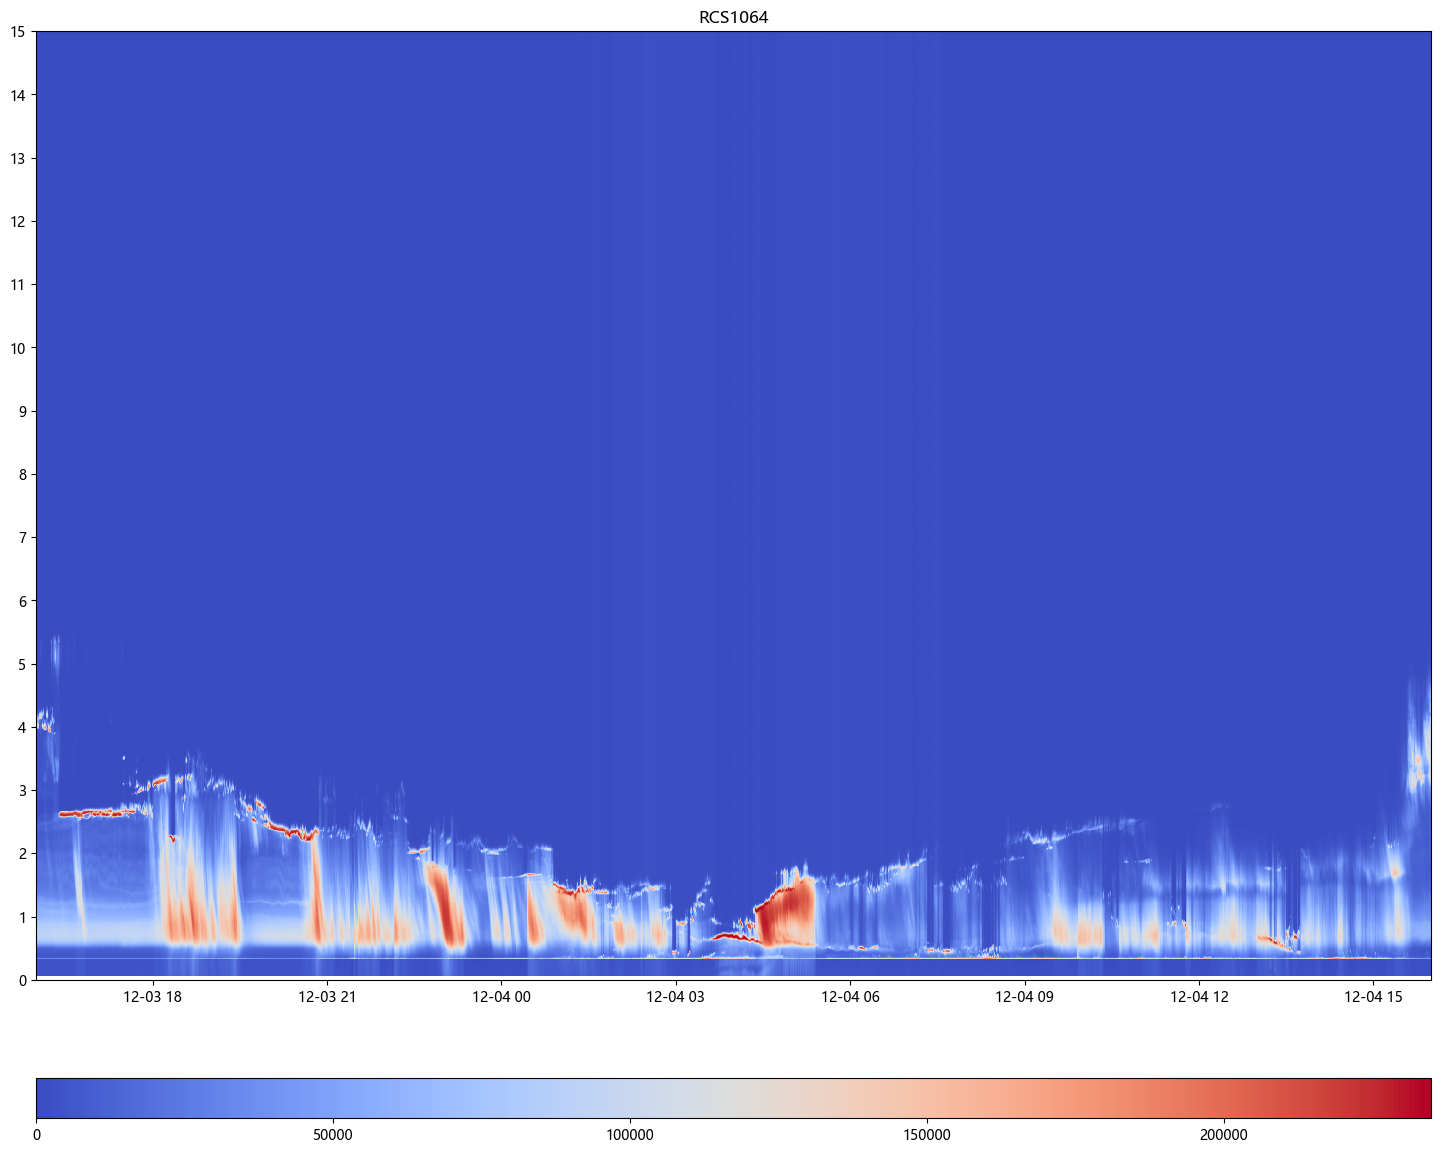

In [10]:
fig,ax=plt.subplots(figsize=(18,16))
cb=ax.pcolormesh(
    dtimes,
    hRCS1064,
    dRCS1064.T,
    cmap='coolwarm',
    vmin=0,
)
ax.set_title('RCS1064')
ax.set_yticks(np.arange(0,16))
ax.set_ylim([0,15])
plt.colorbar(cb, orientation='horizontal', extend='max', extendrect=True, extendfrac='auto', pad=0.08, aspect=35)
plt.show()

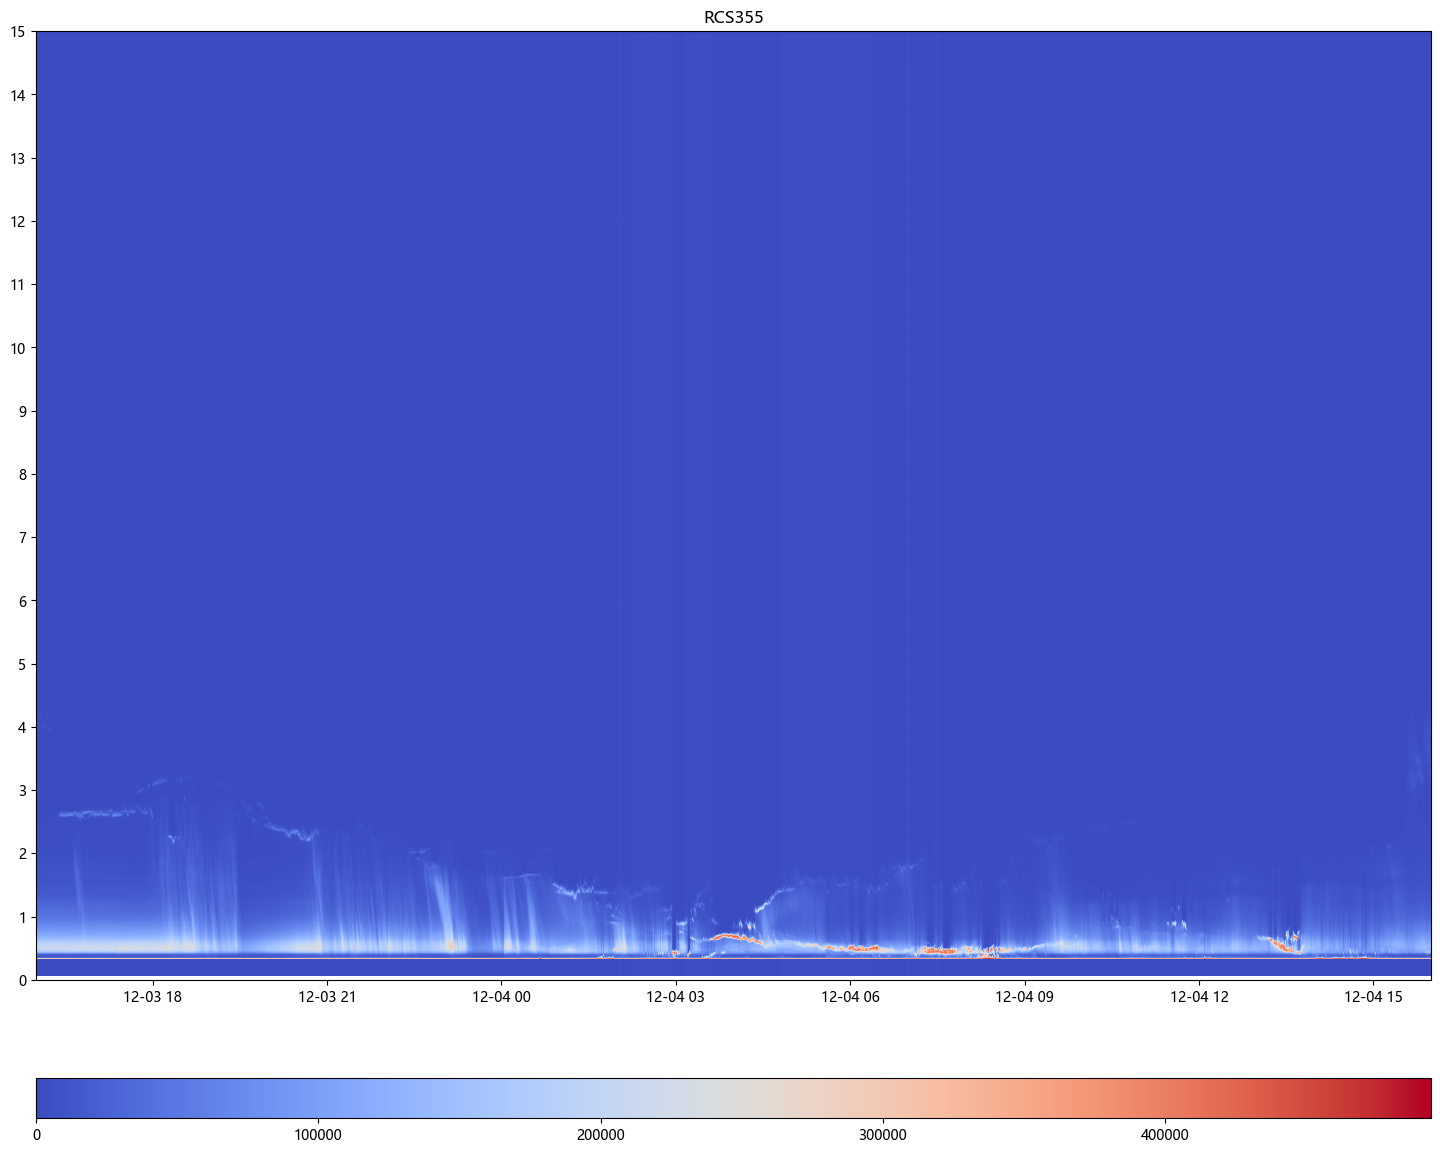

In [11]:
fig,ax=plt.subplots(figsize=(18,16))
cb=ax.pcolormesh(
    dtimes,
    hRCS355,
    dRCS355.T,
    cmap='coolwarm',
    vmin=0,
)
ax.set_title('RCS355')
ax.set_yticks(np.arange(0,16))
ax.set_ylim([0,15])
plt.colorbar(cb, orientation='horizontal', extend='max', extendrect=True, extendfrac='auto', pad=0.08, aspect=35)
plt.show()

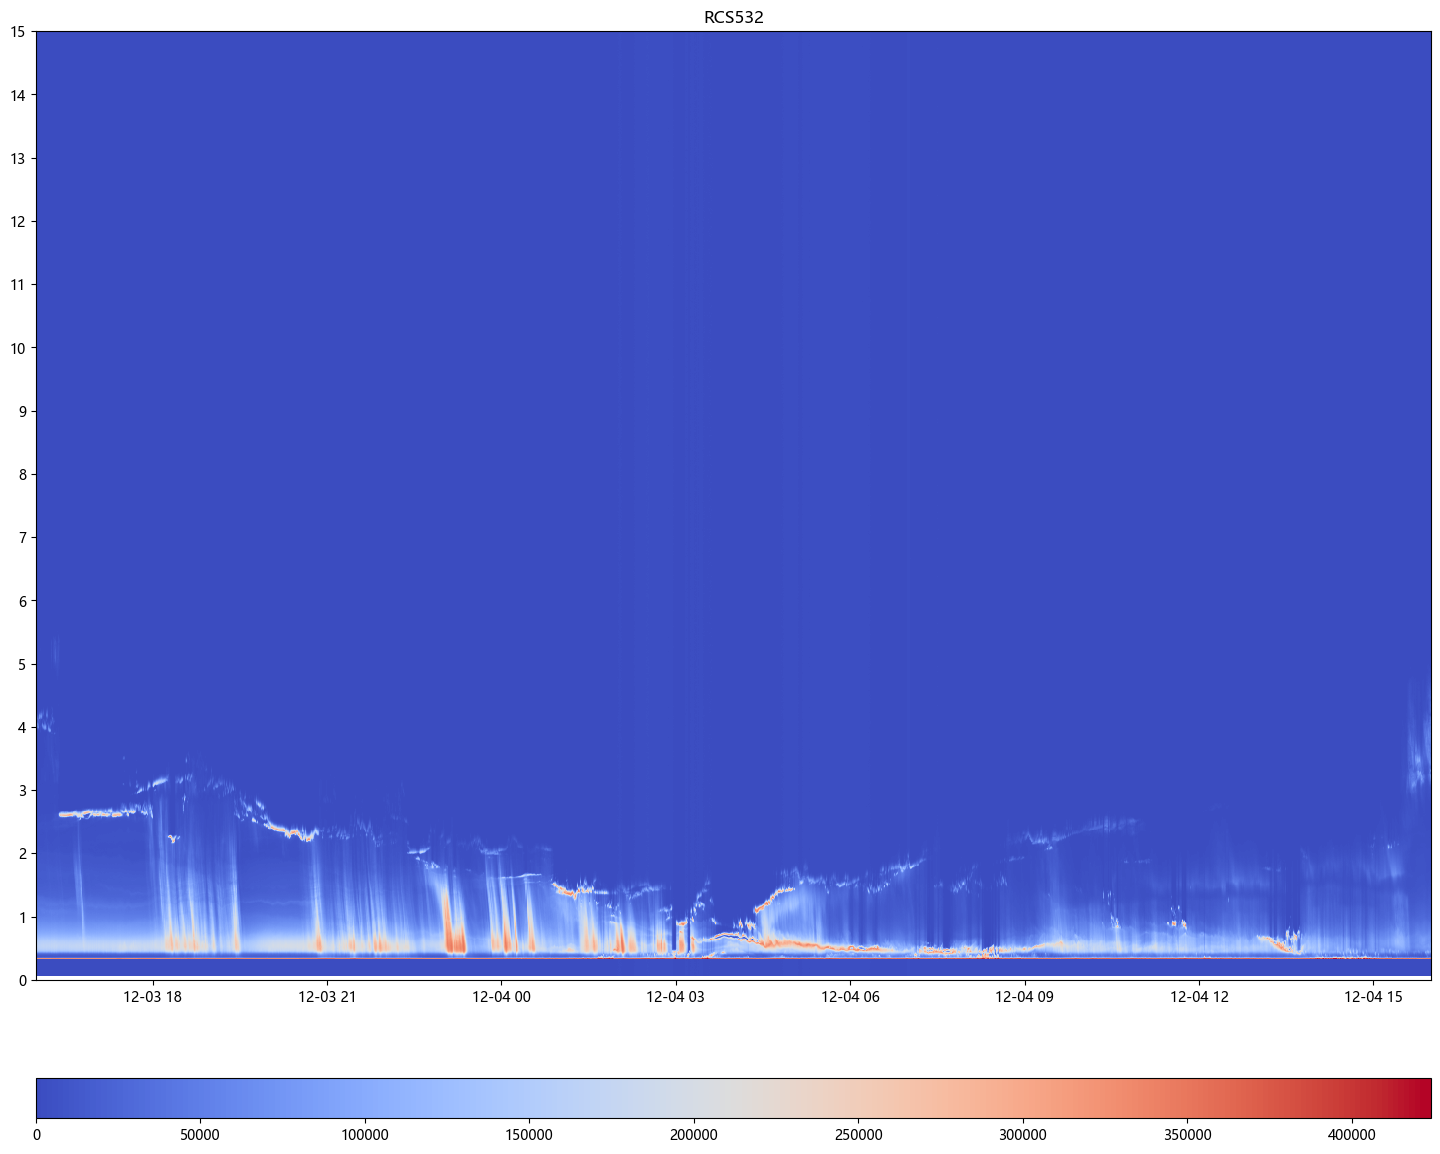

In [12]:
fig,ax=plt.subplots(figsize=(18,16))
cb=ax.pcolormesh(
    dtimes,
    hRCS532,
    dRCS532.T,
    cmap='coolwarm',
    vmin=0,
)
ax.set_title('RCS532')
ax.set_yticks(np.arange(0,16))
ax.set_ylim([0,15])
plt.colorbar(cb, orientation='horizontal', extend='max', extendrect=True, extendfrac='auto', pad=0.08, aspect=35)
plt.show()